In [1]:
from pac_man.search import hill_climbing
from pac_man.utils import manhattan_distance
from pac_man.pacman_problem_astar import PacManProblem
from pac_man.maze_generator import generator

[(1, 2), (2, 2), (3, 2), (3, 3), (3, 4)]


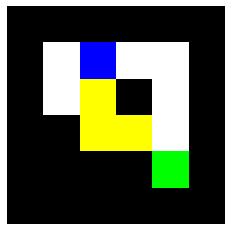

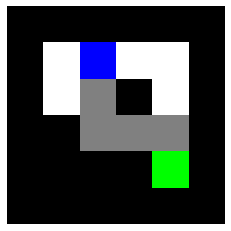

In [2]:
maze = generator.MAZE_simple_coin

def h(node, goal, maze):
    return manhattan_distance(node, goal)

pacman_problem = PacManProblem(maze.start_position, maze.goal_position, maze.maze_map, heuristic=h)
root = hill_climbing(pacman_problem)
path = root[1]
print(path)
maze.show_search_path()
maze.show_search_path(reached=path)

[(5, 1), (4, 1), (3, 1), (2, 1), (2, 2), (2, 3), (1, 3), (2, 3), (3, 3), (4, 3), (5, 3), (5, 4), (5, 5), (4, 5), (3, 5), (2, 5)]


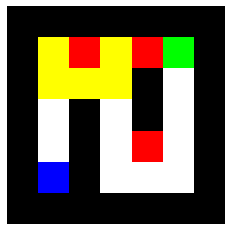

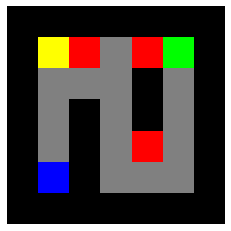

In [6]:
maze = generator.MAZE_1

pacman_problem = PacManProblem(maze.start_position, maze.goal_position, maze.maze_map, heuristic=h)
root = hill_climbing(pacman_problem)
path = root[1]
print(path)
maze.show_search_path()
maze.show_search_path(reached=path)

[(1, 1), (2, 1), (2, 2), (3, 2), (4, 2), (4, 3), (5, 3), (5, 4), (5, 3), (4, 3), (3, 3), (2, 3), (1, 3), (1, 4), (1, 5), (1, 6), (2, 6), (3, 6), (4, 6), (5, 6)]


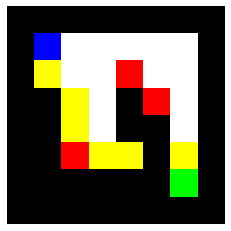

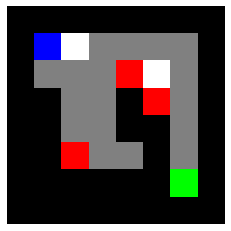

In [7]:
maze = generator.MAZE_X

pacman_problem = PacManProblem(maze.start_position, maze.goal_position, maze.maze_map, heuristic=h)
root = hill_climbing(pacman_problem)
path = root[1]
print(path)
maze.show_search_path()
maze.show_search_path(reached=path)